In [129]:
# Import standard modules
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')




In [130]:
# Load data and print a few rows
FILE_NAME = '/Users/wsyed2/Documents/JNTU/Python/Assignments/internet_session.csv'

     # Loading the Data
df = pd.read_csv(FILE_NAME)

pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 50)
df.head()


name           start_time   usage_time            IP                MAC    upload   download  total_transfer seession_break_reason
0  user1  2022-05-10 02:59:32  00:00:36:28  10.55.14.222  48:E7:DA:58:22:E9  15861.76  333168.64  349030.40       Idle-Timeout        
1  user1  2022-05-10 18:53:27  00:01:49:56  10.55.2.253   48:E7:DA:58:22:E9  16957.44  212152.32  229109.76       Idle-Timeout        
2  user1  2022-05-10 21:20:44  00:01:35:00  10.55.2.253   48:E7:DA:58:22:E9  14080.0   195153.92  209233.92       Idle-Timeout        
3  user1  2022-05-11 00:37:42  00:00:26:00  10.55.2.253   48:E7:DA:58:22:E9  5242.88   40806.4    46049.28        Idle-Timeout        
4  user1  2022-05-11 02:59:38  00:00:11:52  10.55.2.253   48:E7:DA:58:22:E9  22067.2   10772.48   32839.68        Idle-Timeout

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   4712 non-null   object 
 1   start_time             4712 non-null   object 
 2   usage_time             4712 non-null   object 
 3   IP                     4712 non-null   object 
 4   MAC                    4712 non-null   object 
 5   upload                 4712 non-null   object 
 6   download               4712 non-null   object 
 7   total_transfer         4712 non-null   float64
 8   seession_break_reason  4703 non-null   object 
dtypes: float64(1), object(8)
memory usage: 331.4+ KB


In [132]:
df.describe(include='all').transpose()

count unique                  top  freq           mean            std   min       25%       50%        75%          max
name                   4712    9      user4                727   NaN            NaN            NaN   NaN       NaN       NaN        NaN        
start_time             4712    4037   2022-05-10 02:59:32  2     NaN            NaN            NaN   NaN       NaN       NaN        NaN        
usage_time             4712    3558   00:00:25:14          7     NaN            NaN            NaN   NaN       NaN       NaN        NaN        
IP                     4712    1302   10.55.0.89           80    NaN            NaN            NaN   NaN       NaN       NaN        NaN        
MAC                    4712    33     48:E7:DA:58:22:E9    1236  NaN            NaN            NaN   NaN       NaN       NaN        NaN        
upload                 4712    2917   5222.4               8     NaN            NaN            NaN   NaN       NaN       NaN        NaN        
download               4712    3731   1069547.52           10    NaN            NaN            NaN   NaN       NaN       NaN        NaN        
total_transfer         4712.0  NaN    NaN                  NaN   430374.332279  995264.708692  1.12  61870.08  202931.2  499691.52  28552724.48
seession_break_reason  4703    5      Idle-Timeout         4350  NaN            NaN            NaN   NaN       NaN       NaN        NaN

In [133]:
#Change the column names to all lower case , it will be easy to work
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'start_time', 'usage_time', 'ip', 'mac', 'upload', 'download', 'total_transfer', 'seession_break_reason'], dtype='object')

In [134]:
#check for null values
df.isna().sum()


name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64

In [135]:
#seession_break_reason column has 9 null values as number is very low remove these.
df = df.dropna().copy()
df.isna().sum()



name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64

In [136]:
# Now chekc for any duplicate values if so remove them
df.duplicated().sum()


0

In [148]:
# Now change the data type as required , usage_time , upload and download needs formatting
print(df['usage_time'][111])

#df['usage_time'] = df['usage_time'].astype(str).str.replace('00:','', 1)
#print(df['usage_time'][0])
#df[['date','time']] = df['usage_time'].str.split(expand=True)

#df['usage_time'] = (pd.to_datetime(df.pop('date'), format='%Y/%m/%d') + 
#pd.to_timedelta(df.pop('time') + ':00'))
print(df['usage_time'][111])


df['upload'] = df['upload'].astype(str).str.extract('(\d+)', expand=False)
df.upload = df.upload.astype(float)

print(df['upload'][111])


df['download'] = df['download'].astype(str).str.extract('(\d+)', expand=False)
df.download = df.download.astype(float)
print(df['download'][111])

device = []
basename = 'device'
mac = df['mac'][0]
device_number = 1
for i in df['mac']:
    if i == mac:
        device.append(basename + str(device_number))
    else:
        device_number += 1
        device.append(basename + str(device_number))
        mac = i
df['device'] = device
 



00:00:09:16
00:00:09:16
3778.0
25456.0


In [76]:
#Start exploratory analysis
df.describe(include='all', datetime_is_numeric=True)


name           start_time        usage_time          ip                mac        upload      download  total_transfer seession_break_reason      device
count   4703   4703                 4703              4703        4703               4.703000e+03  4.703000e+03  4.703000e+03    4703                  4703      
unique  9      4029                 3533              1299        33                NaN           NaN           NaN              5                     1224      
top     user4  2022-05-10 02:59:32  2023-02-04 25:14  10.55.0.89  48:E7:DA:58:22:E9 NaN           NaN           NaN              Idle-Timeout          device1206
freq    725    2                    7                 80          1235              NaN           NaN           NaN              4350                  194       
mean    NaN    NaN                  NaN               NaN         NaN                3.378702e+04  3.966645e+05  4.304372e+05    NaN                   NaN       
std     NaN    NaN                  NaN               NaN         NaN                9.493243e+04  9.657778e+05  9.960848e+05    NaN                   NaN       
min     NaN    NaN                  NaN               NaN         NaN                2.000000e+00  9.000000e+00  1.120000e+00    NaN                   NaN       
25%     NaN    NaN                  NaN               NaN         NaN                6.082000e+03  5.199800e+04  6.187008e+04    NaN                   NaN       
50%     NaN    NaN                  NaN               NaN         NaN                1.531900e+04  1.782680e+05  2.027930e+05    NaN                   NaN       
75%     NaN    NaN                  NaN               NaN         NaN                3.399600e+04  4.593660e+05  4.993997e+05    NaN                   NaN       
max     NaN    NaN                  NaN               NaN         NaN                2.841640e+06  2.790261e+07  2.855272e+07    NaN                   NaN

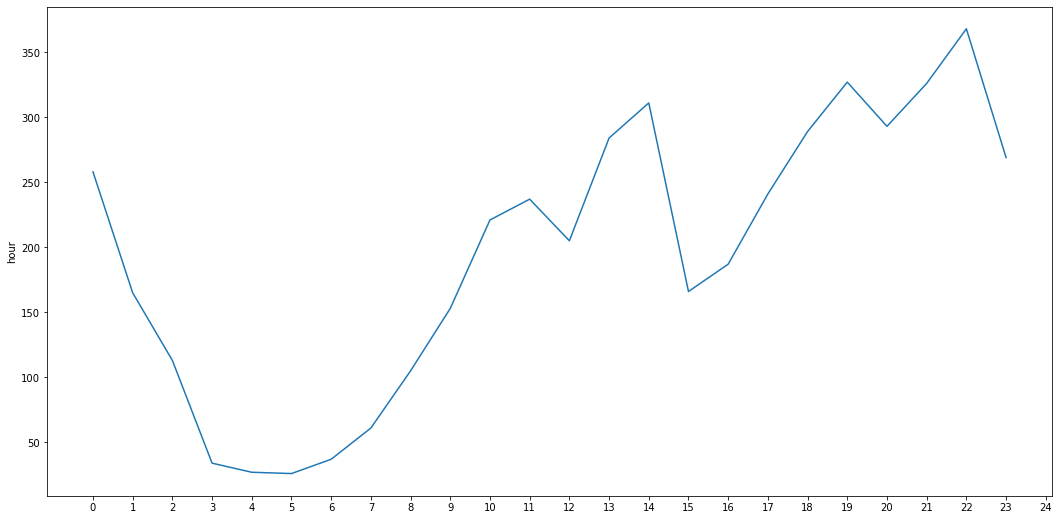

<Figure size 432x288 with 0 Axes>

In [139]:
#What is the most frequent internet activity time of the day ?


df['hour'] = pd.to_datetime(df['start_time']).dt.hour
frequent_activity_time_of_day = df['hour'].value_counts().sort_index()
plt.figure(figsize=(18, 9))
sns.lineplot(data=frequent_activity_time_of_day)
plt.xticks(np.linspace(start=0, stop=24, num=25))
plt.show()
plt.clf()


In [ ]:
#********************#
#Based on the above graph we can conclude the most frequent internet activity time of the day is 22h or 10pm

#********************#

In [140]:
#2.How often the ip changes ?


base_ip = '10.55.14.222' # Take the first ip address as the base_ip address
ip_count = 0   # Initial ip_count is zero assuming no changes to ip_address
for i in range(1, df.shape[0]):
    if df.iloc[i]['ip'] != base_ip:
        ip_count +=1         #increment ip_count when it doesn't match with what is in the current iteration
        base_ip = df.iloc[i]['ip']  # change the base ip to new IP adress which is detected 

print('The IP Adress changed ' + str(ip_count) + ' times')  




The IP Adress changed 2303 times


In [ ]:
#********************#

#The IP Adress changed 2303 times  #
#********************#


In [149]:
#3. How often the device changed.

base_device = 'device1'
device_count = 0
for i in range(1, df.shape[0]):
    if df.iloc[i]['device'] != base_device:
        device_count +=1
        base_device = df.iloc[i]['device']

print('The device changed ' + str(device_count) + ' times') 

The device changed 1223 times


In [ ]:
#********************#

#The device changed 1223 times

#********************#


In [142]:
#What is the average usage per hour , per day and per month ?
df['hour'] = pd.to_datetime(df['start_time']).dt.hour
df['day'] = pd.to_datetime(df['start_time']).dt.day
df['month'] = pd.to_datetime(df['start_time']).dt.month



hourly_average = df.groupby('hour').total_transfer.mean()
print('The Average usage per hour is:\n ' +  str(round(hourly_average, 2)))



The Average usage per hour is:
 hour
0     464530.44
1     530880.86
2     431576.11
3     345303.34
4     359809.44
5     275960.91
6     468959.59
7     292886.83
8     366681.92
9     377480.64
10    393259.12
11    309492.45
12    310137.98
13    335270.58
14    472403.71
15    517005.11
16    403919.40
17    525423.69
18    666590.76
19    389841.79
20    355862.80
21    474038.34
22    449600.50
23    407785.08
Name: total_transfer, dtype: float64


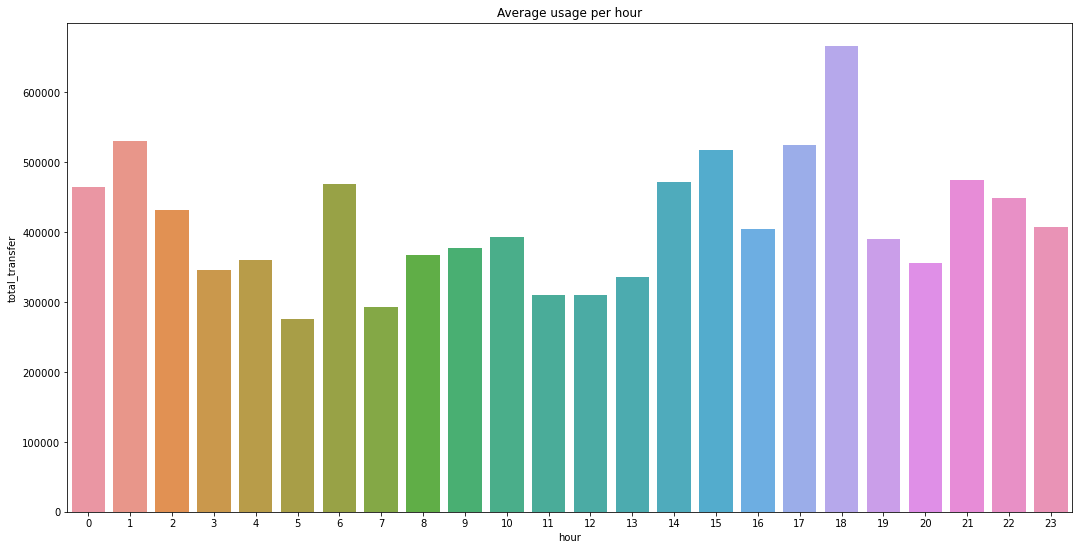

<Figure size 432x288 with 0 Axes>

In [143]:
#Average usage per hour graph

plt.figure(figsize=(18, 9))
sns.barplot(x='hour', y='total_transfer' , data=df, ci=None, estimator=np.mean)
plt.title("Average usage per hour")
plt.show()
plt.clf()

In [144]:
#Average usage per day 
daily_average = df.groupby('day').total_transfer.mean()
print('The Average usage per day is:\n ' +  str(round(daily_average, 2)))

The Average usage per day is:
 day
1     396705.04
2     494496.48
3     445865.63
4     676332.03
5     652195.66
6     396261.75
7     402259.89
8     301859.57
9     393521.97
10    350665.02
11    729857.65
12    346695.95
13    501906.70
14    352701.10
15    521520.51
16    426719.39
17    475795.71
18    337490.93
19    301941.32
20    365130.12
21    462211.69
22    486595.37
23    383153.93
24    320598.94
25    443689.47
26    463432.02
27    324318.12
28    494576.34
29    363645.61
30    361418.88
31    369118.01
Name: total_transfer, dtype: float64


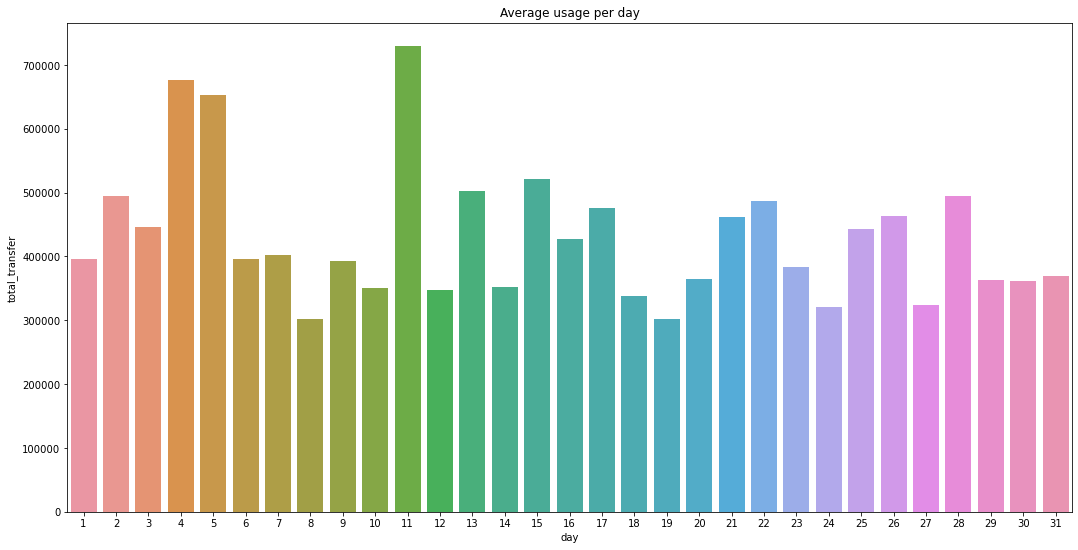

<Figure size 432x288 with 0 Axes>

In [145]:
#Average usage per day  graph

plt.figure(figsize=(18, 9))
sns.barplot(x='day', y='total_transfer' , data=df, ci=None, estimator=np.mean)
plt.title("Average usage per day")
plt.show()
plt.clf()

In [146]:
#Average usage per month 

monthly_average = df.groupby('month').total_transfer.mean()
print('The Average usage per month is:\n ' +  str(round(monthly_average, 2)))

The Average usage per month is:
 month
5     311177.16
6     338418.08
7     418583.99
8     479042.44
9     482955.52
10    549467.63
11    399804.11
Name: total_transfer, dtype: float64


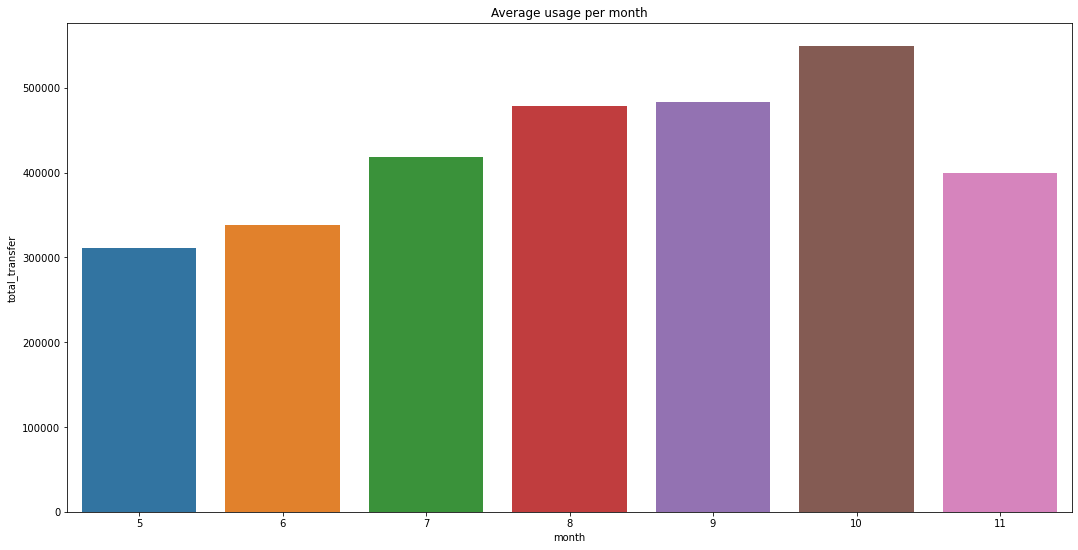

<Figure size 432x288 with 0 Axes>

In [147]:
#Average usage per month Graph

plt.figure(figsize=(18, 9))
sns.barplot(x='month', y='total_transfer' , data=df, ci=None, estimator=np.mean)
plt.title("Average usage per month")
plt.show()
plt.clf()